## SRFP AQI data analysis and visualization for Delhi city

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from functions import dplot, stat_calc, aqi_calc, score_calc

# Use seaborn style defaults and set default figure size
sns.set_style("whitegrid")

In [2]:
dfmod = pd.read_csv('data/aqi_data_mod.csv')
dfobs = pd.read_csv('data/aqi_data_obs.csv')

In [3]:
dfmod.isna().sum()

date               0
hour               0
mod_PM2.5          0
mod_PM2.5_stdev    0
mod_PM10           0
mod_PM10_stdev     0
dtype: int64

In [4]:
dfobs.isna().sum()

date                0
hour                0
obs_PM2.5          33
obs_PM2.5_stdev    52
obs_PM10           33
obs_PM10_stdev     52
dtype: int64

In [5]:
dfmod.head()

,date,hour,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev
0,2020-11-1,0:00:00,152.61,51.64,241.71,105.98
1,2020-11-1,1:00:00,159.82,53.31,254.49,111.38
2,2020-11-1,2:00:00,160.04,51.57,252.47,109.05
3,2020-11-1,3:00:00,156.73,40.47,242.03,87.21
4,2020-11-1,4:00:00,156.32,41.95,232.03,84.02


In [6]:
dfobs.head()

,date,hour,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev
0,2020-11-01,0:00:00,387.90,158.73,561.44,165.77
1,2020-11-01,1:00:00,348.11,143.39,486.04,159.66
2,2020-11-01,2:00:00,326.03,120.39,516.67,134.42
3,2020-11-01,3:00:00,302.90,111.29,514.41,125.31
4,2020-11-01,4:00:00,309.05,104.38,520.55,102.16


In [7]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

In [8]:
dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [9]:
dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

In [10]:
dfobs.head()

,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime
datetime,,,,,
2020-11-01 00:00:00,387.90,158.73,561.44,165.77,2020-11-01 00:00:00
2020-11-01 01:00:00,348.11,143.39,486.04,159.66,2020-11-01 01:00:00
2020-11-01 02:00:00,326.03,120.39,516.67,134.42,2020-11-01 02:00:00
2020-11-01 03:00:00,302.90,111.29,514.41,125.31,2020-11-01 03:00:00
2020-11-01 04:00:00,309.05,104.38,520.55,102.16,2020-11-01 04:00:00


In [11]:
# Do interpolatoin of the observed data

dfobs = dfobs.interpolate(method = 'time')

In [12]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

### Time series plot without errorbars and using raw data

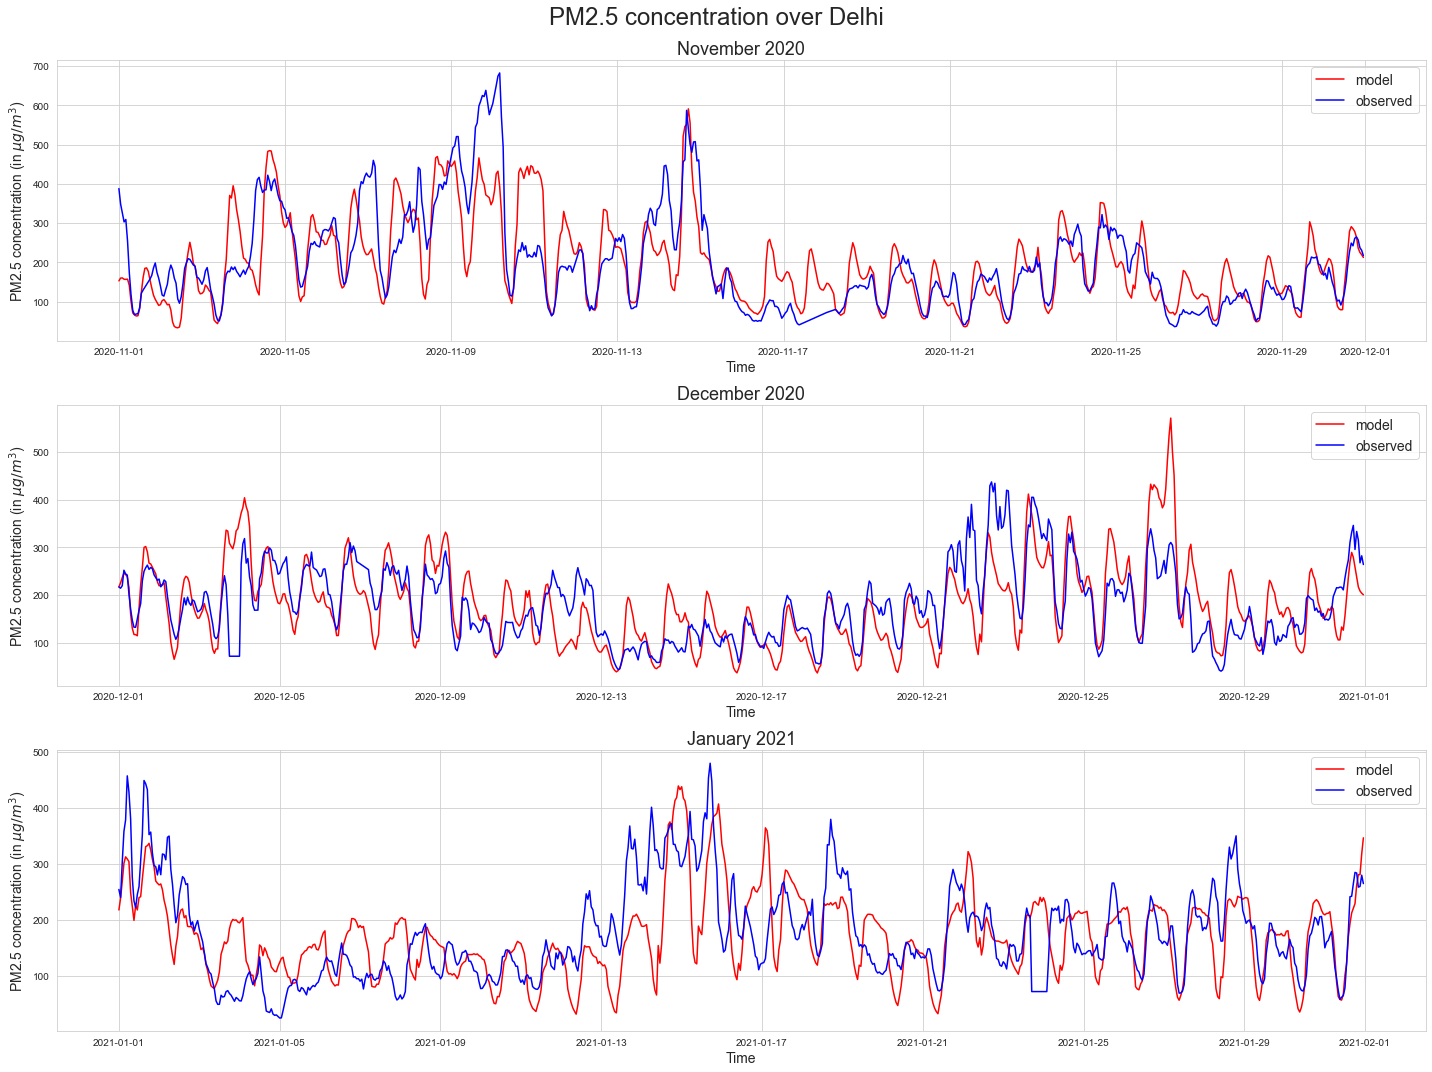

In [13]:
# Plot of PM2.5 model and data for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod.loc["2020-11-01":"2020-11-30"], x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.xticks(rotation= 10)
sns.lineplot(data = dfobs.loc["2020-11-01":"2020-11-30"], x='datetime', y='obs_PM2.5', err_style='band', label='observed', color = 'blue')
#plt.xticks(rotation= 10)
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 14})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod.loc["2020-12-01":"2020-12-31"], x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.xticks(rotation= 10)
sns.lineplot(data = dfobs.loc["2020-12-01":"2020-12-31"], x='datetime', y='obs_PM2.5', err_style='band', label='observed', color = 'blue')
#plt.xticks(rotation= 10)
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 14})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod.loc["2021-01-01":"2021-01-31"], x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.xticks(rotation= 10)
sns.lineplot(data = dfobs.loc["2021-01-01":"2021-01-31"], x='datetime', y='obs_PM2.5', err_style='band', label='observed', color = 'blue')
#plt.xticks(rotation= 10)
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 14})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts.png')

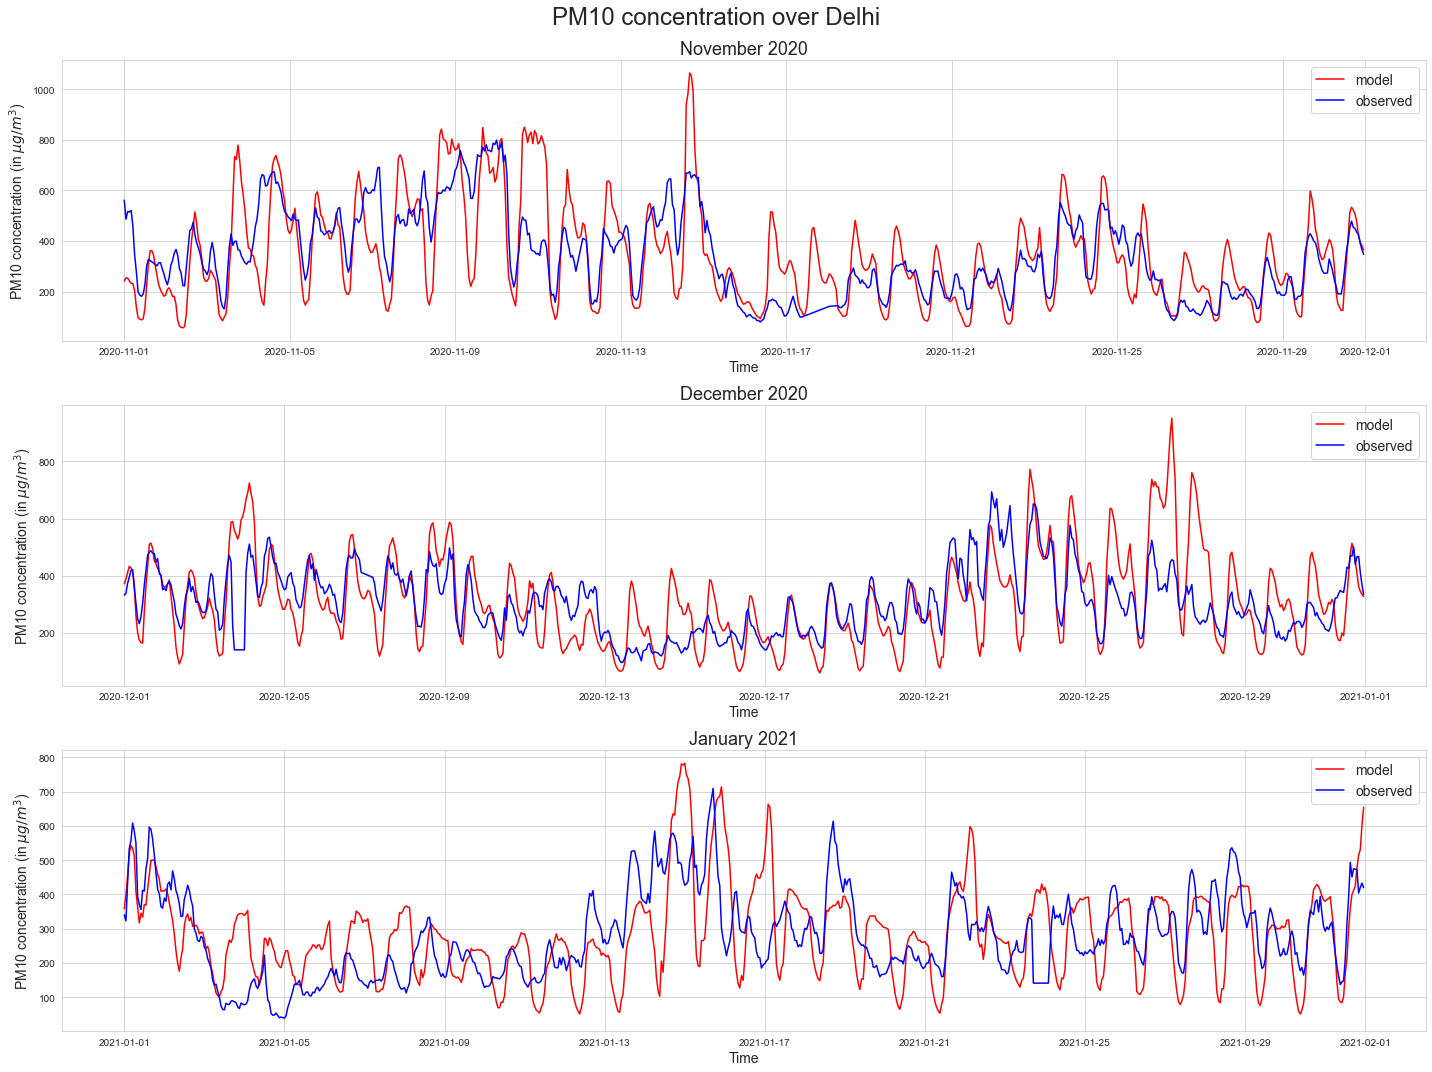

In [14]:
# Plot of PM10 model and data for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod.loc["2020-11-01":"2020-11-30"], x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.xticks(rotation= 10)
sns.lineplot(data = dfobs.loc["2020-11-01":"2020-11-30"], x='datetime', y='obs_PM10', err_style='band', label='observed', color = 'blue')
#plt.xticks(rotation= 10)
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 14})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod.loc["2020-12-01":"2020-12-31"], x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.xticks(rotation= 10)
sns.lineplot(data = dfobs.loc["2020-12-01":"2020-12-31"], x='datetime', y='obs_PM10', err_style='band', label='observed', color = 'blue')
#plt.xticks(rotation= 10)
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 14})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod.loc["2021-01-01":"2021-01-31"], x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.xticks(rotation= 10)
sns.lineplot(data = dfobs.loc["2021-01-01":"2021-01-31"], x='datetime', y='obs_PM10', err_style='band', label='observed', color = 'blue')
#plt.xticks(rotation= 10)
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 14})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts.png')

### Plotting with errorbars using raw data

In [14]:
# Extracting the different values for the months

dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month

dfmod

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime,month
datetime,,,,,,
2020-11-01 00:00:00,152.61,51.64,241.71,105.98,2020-11-01 00:00:00,11
2020-11-01 01:00:00,159.82,53.31,254.49,111.38,2020-11-01 01:00:00,11
2020-11-01 02:00:00,160.04,51.57,252.47,109.05,2020-11-01 02:00:00,11
2020-11-01 03:00:00,156.73,40.47,242.03,87.21,2020-11-01 03:00:00,11
2020-11-01 04:00:00,156.32,41.95,232.03,84.02,2020-11-01 04:00:00,11
...,...,...,...,...,...,...
2021-01-31 19:00:00,262.13,176.70,477.64,333.23,2021-01-31 19:00:00,1
2021-01-31 20:00:00,280.50,190.57,515.65,363.73,2021-01-31 20:00:00,1
2021-01-31 21:00:00,280.55,165.43,531.10,333.06,2021-01-31 21:00:00,1


In [15]:
splits1 = dfmod.groupby('month')
splits2 = dfobs.groupby('month')

In [16]:
dfmod_jan = list(splits1)[0][1]
dfmod_nov = list(splits1)[1][1]
dfmod_dec = list(splits1)[2][1]

dfobs_jan = list(splits2)[0][1]
dfobs_nov = list(splits2)[1][1]
dfobs_dec = list(splits2)[2][1]

In [17]:
dfobs_jan

,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime,month
datetime,,,,,,
2021-01-01 00:00:00,254.10,175.23,340.68,224.71,2021-01-01 00:00:00,1
2021-01-01 01:00:00,239.93,180.57,322.94,238.92,2021-01-01 01:00:00,1
2021-01-01 02:00:00,302.58,158.82,434.00,212.80,2021-01-01 02:00:00,1
2021-01-01 03:00:00,357.43,158.88,534.30,215.98,2021-01-01 03:00:00,1
2021-01-01 04:00:00,377.91,200.52,557.63,252.32,2021-01-01 04:00:00,1
...,...,...,...,...,...,...
2021-01-31 19:00:00,283.41,132.55,473.15,212.18,2021-01-31 19:00:00,1
2021-01-31 20:00:00,258.25,111.13,404.22,162.62,2021-01-31 20:00:00,1
2021-01-31 21:00:00,259.50,102.70,420.72,145.34,2021-01-31 21:00:00,1


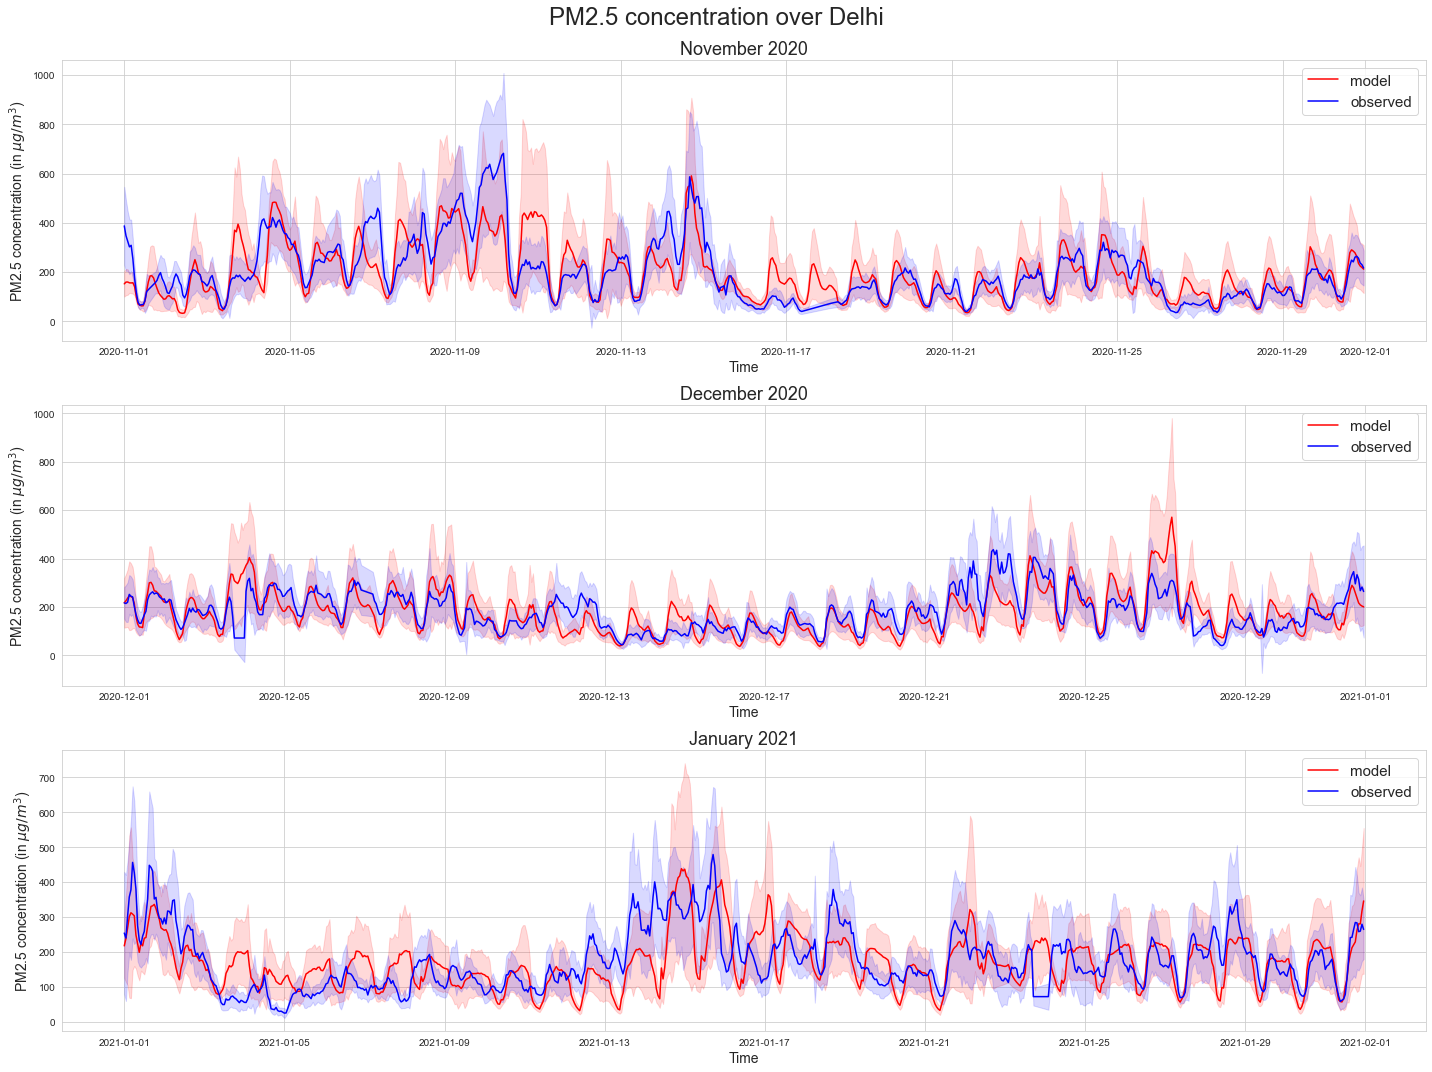

In [45]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM2.5'], yerr=dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM2.5'] + dfmod_nov['mod_PM2.5_stdev'], dfmod_nov['mod_PM2.5'] - dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM2.5'], yerr=dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM2.5'] + dfobs_nov['obs_PM2.5_stdev'], dfobs_nov['obs_PM2.5'] - dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_dec.index, dfmod_dec['mod_PM2.5'], yerr=dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM2.5'] + dfmod_dec['mod_PM2.5_stdev'], dfmod_dec['mod_PM2.5'] - dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_dec.index, dfobs_dec['obs_PM2.5'], yerr=dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM2.5'] + dfobs_dec['obs_PM2.5_stdev'], dfobs_dec['obs_PM2.5'] - dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_jan.index, dfmod_jan['mod_PM2.5'], yerr=dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM2.5'] + dfmod_jan['mod_PM2.5_stdev'], dfmod_jan['mod_PM2.5'] - dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_jan.index, dfobs_jan['obs_PM2.5'], yerr=dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM2.5'] + dfobs_jan['obs_PM2.5_stdev'], dfobs_jan['obs_PM2.5'] - dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err.png')

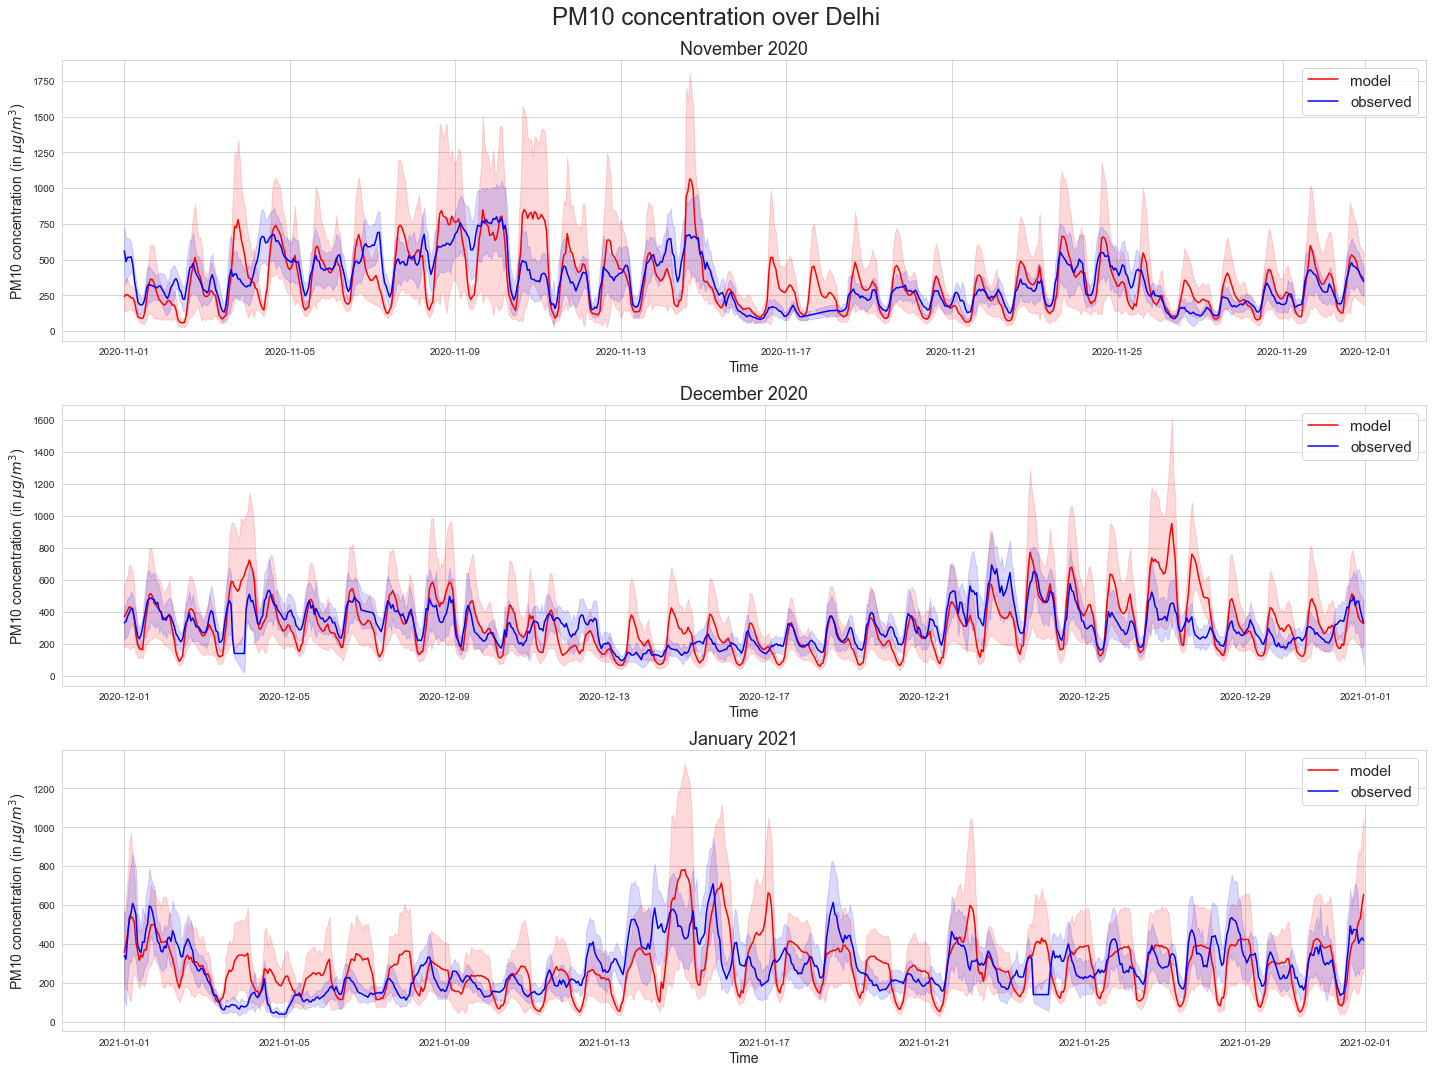

In [20]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM10'] + dfmod_nov['mod_PM10_stdev '], dfmod_nov['mod_PM10'] - dfmod_nov['mod_PM10_stdev '], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM10'] + dfobs_nov['obs_PM10_stdev '], dfobs_nov['obs_PM10'] - dfobs_nov['obs_PM10_stdev '], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM10'] + dfmod_dec['mod_PM10_stdev '], dfmod_dec['mod_PM10'] - dfmod_dec['mod_PM10_stdev '], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM10'] + dfobs_dec['obs_PM10_stdev '], dfobs_dec['obs_PM10'] - dfobs_dec['obs_PM10_stdev '], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM10'] + dfmod_jan['mod_PM10_stdev '], dfmod_jan['mod_PM10'] - dfmod_jan['mod_PM10_stdev '], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM10'] + dfobs_jan['obs_PM10_stdev '], dfobs_jan['obs_PM10'] - dfobs_jan['obs_PM10_stdev '], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err.png')

## Diurnal variation plot for overall winter (NDJ combined)

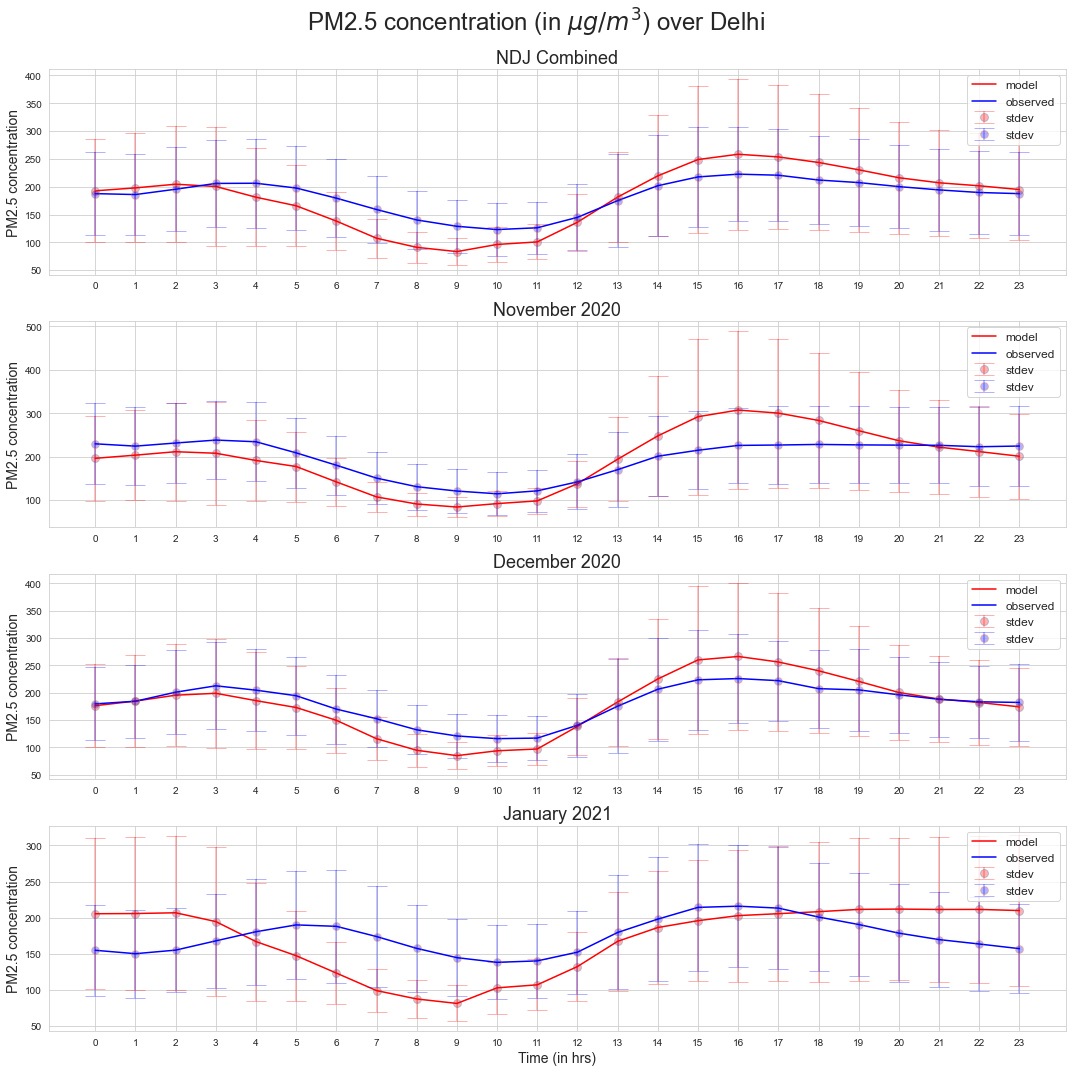

In [18]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration (in $\mu g/m^3$) over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm25.png')

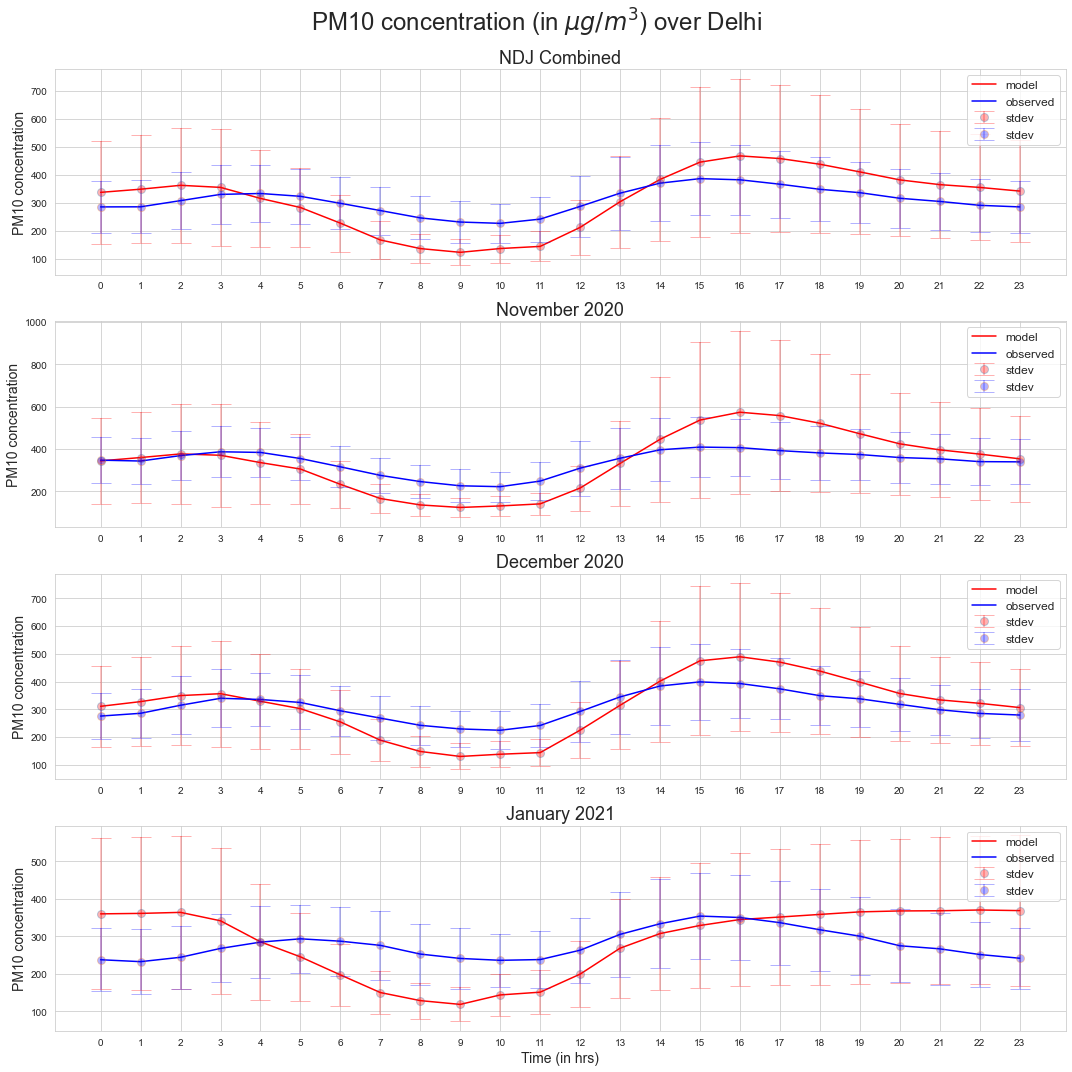

In [19]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev ', obs_stdev='obs_PM10_stdev ')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev ', obs_stdev='obs_PM10_stdev ')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev ', obs_stdev='obs_PM10_stdev ')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev ', obs_stdev='obs_PM10_stdev ')
plt.ylabel('PM10 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration (in $\mu g/m^3$) over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm10.png')

## Take the running average for the data

In [20]:
dfmod.rename(columns={
    "mod_PM10_stdev ":"mod_PM10_stdev",
}, inplace=True)

dfobs.rename(columns={
    "obs_PM10_stdev ":"obs_PM10_stdev"
}, inplace=True)

In [21]:
df = aqi_calc.get_aqi(dfmod, dfobs)

In [22]:
df.shape

(2185, 20)

In [23]:
df.tail()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2021-01-31 19:00:00,262.13,477.64,169.556250,94.367917,304.631250,181.144583,338.108756,254.631250,4,3,283.41,473.15,163.405000,70.887083,312.015000,130.423750,333.378445,262.015000,4,3
2021-01-31 20:00:00,280.50,515.65,171.562083,97.251250,308.490417,186.558750,339.651242,258.490417,4,3,258.25,404.22,166.218750,72.538750,314.311250,131.777500,335.542219,264.311250,4,3
2021-01-31 21:00:00,280.55,531.10,173.837083,98.862083,313.481667,190.334167,341.400717,263.481667,4,3,259.50,420.72,168.468750,73.830417,315.406250,129.229583,337.272469,265.406250,4,3
2021-01-31 22:00:00,317.31,602.42,178.011667,101.294583,322.102083,195.576667,344.610972,272.102083,4,3,279.51,433.31,171.528750,74.962083,319.125000,131.076667,339.625609,269.125000,4,3
2021-01-31 23:00:00,346.14,654.82,183.647083,105.107500,333.397917,202.817500,348.944607,283.397917,4,3,264.59,419.70,174.874583,75.262917,323.839583,131.555833,342.198555,273.839583,4,3


## Critical PM2.5 and PM10 skill scores combined

In [24]:
score_calc.get_critical_score(df)

Key25 is :  ['a', 'b', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([220, 75, 151, 1739])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([182, 101, 146, 1756])
Performance metrics or Skill score for Critical PM2.5 are:

A =  89.65675057208237
FAR =  25.423728813559322
POD =  59.299191374663074
CSI =  49.327354260089685
FOM =  40.700808625336926
FOH =  74.57627118644068
PON =  95.86549062844543
POFD =  4.134509371554575
DFR =  7.989417989417989
FOCN =  92.01058201058201
TSS =  0.551646820031085
Heidke =  0.6005807557913809 

Performance metrics or Skill score for Critical PM10 are:

A =  88.69565217391305
FAR =  35.68904593639576
POD =  55.487804878048784
CSI =  42.42424242424242
FOM =  44.51219512195122
FOH =  64.31095406360424
PON =  94.56112008616047
POFD =  5.438879913839526
DFR =  7.676130389064142
FOCN =  92.32386961093586
TSS =  0.5004892496420926
Heidke 

## Very unhealthy PM2.5 and PM10 skill scores combined

In [25]:
score_calc.get_veryunhealthy_score(df)

Key25 is :  ['a', 'b', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([1528, 283, 186, 188])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([476, 211, 233, 1265])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  78.53546910755149
FAR =  15.626725565985645
POD =  89.14819136522753
CSI =  76.51477215823735
FOM =  10.851808634772462
FOH =  84.37327443401436
PON =  39.91507430997877
POFD =  60.08492569002123
DFR =  49.73262032085562
FOCN =  50.26737967914438
TSS =  0.29063265675206307
Heidke =  0.3140874568361672 

Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  79.67963386727689
FAR =  30.71324599708879
POD =  67.13681241184767
CSI =  51.73913043478261
FOM =  32.86318758815233
FOH =  69.28675400291121
PON =  85.70460704607046
POFD =  14.29539295392954
DFR =  15.554072096128172
FOCN =  84.44592790387183
TSS =  0.52841419457

## Unhealthy PM2.5 and PM10 skill scores combined

In [26]:
score_calc.get_unhealthy_score(df)

Key25 is :  ['a', 'b', 'c']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([2008, 175, 2, 0])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([1292, 189, 184, 520])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  91.89931350114416
FAR =  8.016491067338526
POD =  99.90049751243781
CSI =  91.89931350114416
FOM =  0.09950248756218905
FOH =  91.98350893266148
PON =  0.0
POFD =  100.0
DFR =  100.0
FOCN =  0.0
TSS =  -0.0009950248756218638
Heidke =  -0.0018132601121630897 

Performance metrics or Skill score for Unhealthy PM10 are:

A =  82.92906178489703
FAR =  12.761647535449022
POD =  87.53387533875339
CSI =  77.5975975975976
FOM =  12.466124661246612
FOH =  87.23835246455099
PON =  73.34273624823695
POFD =  26.657263751763043
DFR =  26.136363636363637
FOCN =  73.86363636363636
TSS =  0.6087661158699034
Heidke =  0.6098836215789037 



## Statistical performance combined

In [27]:
stat_calc.get_stat_performance(df, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  -2.065362128146454
mean bias pm10 =  5.371324180015254
mean bias aqi_pm2.5 =  7.81858830650743
mean bias aqi_pm10 =  2.2136541237604894 

fractional bias is :
fractional bias pm2.5 =  -0.01132377682849823
fractional bias pm10 =  0.01727653692075466
fractional bias aqi_pm2.5 =  0.02306909479367706
fractional bias aqi_pm10 =  0.008097028076129106 

Correlation coefficient is :
corr coeff pm2.5 =  0.8020412520867422  and p-value is =  0.0
corr coeff pm10 =  0.7738097540247766  and p-value is =  0.0
corr coeff aqi_pm2.5 =  0.696616205424075  and p-value is =  3.7527724e-317
corr coeff aqi_pm10 =  0.7695778744441482 
  and p-value is =  0.0
RMSE is :
RMSE pm2.5 =  48.17746556522817
RMSE pm10 =  74.81548023404702
RMSE aqi_pm2.5 =  61.480178362768186
RMSE aqi_pm10 =  79.70818576556577 

NMSE is :
NMSE pm2.5 =  0.06977374062154372
NMSE pm10 =  0.057911658186798706
NMSE aqi_pm2.5 =  0.032910345254510934
NMSE aqi_pm10 =  0.08500505012356444 



## Doing the same critical PM2.5 and PM10 skill score for different winter months and also finding the statistical performance

### Extracting the various months

In [28]:
# Extracting the separate values for the winter months separately
dfnov = df.loc['2020-11-01':'2020-11-30']
dfdec = df.loc['2020-12-01':'2020-12-31']
dfjan = df.loc['2021-01-01':'2021-01-31']

dfnov.head()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2020-11-01 23:00:00,90.07,181.35,127.504583,59.183333,219.647500,118.243750,305.771025,178.967350,4,2,159.32,270.60,179.448750,66.654167,335.294375,99.067708,345.716089,285.294375,4,3
2020-11-02 00:00:00,91.95,186.83,124.977083,59.065833,217.360833,118.301250,303.827377,177.458150,4,2,139.33,244.12,169.091667,63.607917,322.072708,97.627292,337.751492,272.072708,4,3
2020-11-02 01:00:00,102.19,208.51,122.575833,59.254167,215.445000,118.876667,301.980816,176.193700,4,2,116.35,226.64,159.435000,60.396667,311.264375,95.753542,330.325515,261.264375,4,3
2020-11-02 02:00:00,104.84,214.72,120.275833,59.528750,213.872083,119.806250,300.212116,175.155575,4,2,113.74,254.27,150.589583,58.083333,300.331042,95.091875,323.523390,250.331042,4,3
2020-11-02 03:00:00,99.08,200.06,117.873750,60.251250,212.123333,121.276667,292.819588,174.001400,3,2,129.55,304.04,143.366667,56.084167,291.565625,95.260208,317.968967,241.565625,4,3


### Critical PM2.5 and PM10 scores for separate months

**November**

In [29]:
score_calc.get_critical_score(dfnov)

Key25 is :  ['a', 'b', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([137, 26, 40, 494])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([124, 26, 66, 481])
Performance metrics or Skill score for Critical PM2.5 are:

A =  90.53084648493544
FAR =  15.950920245398773
POD =  77.40112994350282
CSI =  67.48768472906403
FOM =  22.598870056497177
FOH =  84.04907975460122
PON =  95.0
POFD =  5.0
DFR =  7.490636704119851
FOCN =  92.50936329588015
TSS =  0.7240112994350282
Heidke =  0.7434040986624125 

Performance metrics or Skill score for Critical PM10 are:

A =  86.80057388809182
FAR =  17.333333333333336
POD =  65.26315789473685
CSI =  57.407407407407405
FOM =  34.73684210526316
FOH =  82.66666666666667
PON =  94.87179487179486
POFD =  5.128205128205128
DFR =  12.065813528336381
FOCN =  87.93418647166362
TSS =  0.6013495276653171
Heidke =  0.6437159684409379 



In [30]:
score_calc.get_veryunhealthy_score(dfnov)

Key25 is :  ['a', 'b', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([496, 109, 33, 59])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([253, 64, 22, 358])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  79.62697274031564
FAR =  18.016528925619834
POD =  93.76181474480151
CSI =  77.74294670846395
FOM =  6.238185255198488
FOH =  81.98347107438016
PON =  35.11904761904761
POFD =  64.88095238095238
DFR =  35.869565217391305
FOCN =  64.13043478260869
TSS =  0.28880862363849125
Heidke =  0.3415254011762514 

Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  87.66140602582496
FAR =  20.189274447949526
POD =  92.0
CSI =  74.63126843657817
FOM =  8.0
FOH =  79.81072555205047
PON =  84.83412322274881
POFD =  15.165876777251185
DFR =  5.7894736842105265
FOCN =  94.21052631578948
TSS =  0.7683412322274882
Heidke =  0.7484324768963

In [31]:
score_calc.get_unhealthy_score(dfnov)

Key25 is :  ['a', 'b']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([610, 87, 0, 0])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([423, 73, 40, 161])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  87.51793400286944
FAR =  12.48206599713056
POD =  100.0
CSI =  87.51793400286944
FOM =  0.0
FOH =  87.51793400286944
PON =  0.0
POFD =  100.0
TSS =  0.0
Heidke =  0.0 

Performance metrics or Skill score for Unhealthy PM10 are:

A =  83.78766140602582
FAR =  14.717741935483872
POD =  91.36069114470843
CSI =  78.9179104477612
FOM =  8.639308855291576
FOH =  85.28225806451613
PON =  68.80341880341881
POFD =  31.196581196581196
DFR =  19.900497512437813
FOCN =  80.09950248756219
TSS =  0.6016410994812723
Heidke =  0.6233819640696802 



In [32]:
stat_calc.get_stat_performance(dfnov, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  0.03189383070300609
mean bias pm10 =  6.357450382592061
mean bias aqi_pm2.5 =  16.448663093809785
mean bias aqi_pm10 =  0.43214548660927865 

fractional bias is :
fractional bias pm2.5 =  0.00016229163379654051
fractional bias pm10 =  0.018620332377533785
fractional bias aqi_pm2.5 =  0.0472993153453743
fractional bias aqi_pm10 =  0.0013984745962575572 

Correlation coefficient is :
corr coeff pm2.5 =  0.8840262034793559  and p-value is =  9.815668112752508e-232
corr coeff pm10 =  0.8608325469607563  and p-value is =  4.449213642010794e-206
corr coeff aqi_pm2.5 =  0.7932975602426616  and p-value is =  6.423626897569022e-152
corr coeff aqi_pm10 =  0.8611956987941614 
  and p-value is =  1.9196537236039383e-206
RMSE is :
RMSE pm2.5 =  52.67309806814286
RMSE pm10 =  74.14887472985313
RMSE aqi_pm2.5 =  73.01398649416242
RMSE aqi_pm10 =  79.76534377541405 

NMSE is :
NMSE pm2.5 =  0.07183839556325525
NMSE pm10 =  0.04716889196442887
NMSE aqi_pm2.5 =  0.04410660

**December**

In [33]:
score_calc.get_critical_score(dfdec)

Key25 is :  ['a', 'b', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([26, 48, 49, 621])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([20, 69, 39, 616])
Performance metrics or Skill score for Critical PM2.5 are:

A =  86.96236559139786
FAR =  64.86486486486487
POD =  34.66666666666667
CSI =  21.138211382113823
FOM =  65.33333333333333
FOH =  35.13513513513514
PON =  92.82511210762333
POFD =  7.174887892376682
DFR =  7.313432835820896
FOCN =  92.6865671641791
TSS =  0.2749177877428999
Heidke =  0.2765547936966197 

Performance metrics or Skill score for Critical PM10 are:

A =  85.48387096774194
FAR =  77.52808988764045
POD =  33.89830508474576
CSI =  15.625
FOM =  66.10169491525424
FOH =  22.47191011235955
PON =  89.92700729927007
POFD =  10.072992700729927
DFR =  5.9541984732824424
FOCN =  94.04580152671755
TSS =  0.23825312384015834
Heidke =  0.19333400261017

In [34]:
score_calc.get_veryunhealthy_score(dfdec)

Key25 is :  ['a', 'b', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([507, 70, 99, 68])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([137, 98, 122, 387])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  77.28494623655914
FAR =  12.131715771230503
POD =  83.66336633663366
CSI =  75.0
FOM =  16.33663366336634
FOH =  87.8682842287695
PON =  49.275362318840585
POFD =  50.72463768115942
DFR =  59.2814371257485
FOCN =  40.7185628742515
TSS =  0.32938728655474236
Heidke =  0.30466520671577413 

Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  70.43010752688173
FAR =  41.702127659574465
POD =  52.8957528957529
CSI =  38.37535014005603
FOM =  47.10424710424711
FOH =  58.29787234042553
PON =  79.79381443298969
POFD =  20.20618556701031
DFR =  23.968565815324165
FOCN =  76.03143418467585
TSS =  0.3268956732874259
Heidke =  0.334

In [35]:
score_calc.get_unhealthy_score(dfdec)

Key25 is :  ['a', 'b', 'c']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([708, 34, 2, 0])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([474, 42, 89, 139])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  95.16129032258065
FAR =  4.5822102425876015
POD =  99.71830985915493
CSI =  95.16129032258065
FOM =  0.28169014084507044
FOH =  95.4177897574124
PON =  0.0
POFD =  100.0
DFR =  100.0
FOCN =  0.0
TSS =  -0.0028169014084507005
Heidke =  -0.005103572500750525 

Performance metrics or Skill score for Unhealthy PM10 are:

A =  82.39247311827957
FAR =  8.13953488372093
POD =  84.19182948490231
CSI =  78.34710743801652
FOM =  15.808170515097691
FOH =  91.86046511627907
PON =  76.79558011049724
POFD =  23.204419889502763
DFR =  39.03508771929825
FOCN =  60.96491228070175
TSS =  0.6098740959539956
Heidke =  0.5604978354978355 



In [36]:
stat_calc.get_stat_performance(dfdec, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  -1.1914572132616468
mean bias pm10 =  4.230082325268838
mean bias aqi_pm2.5 =  0.7878714045698951
mean bias aqi_pm10 =  6.593466887880833 

fractional bias is :
fractional bias pm2.5 =  -0.006656020721939076
fractional bias pm10 =  0.013587520743564936
fractional bias aqi_pm2.5 =  0.002330534678576087
fractional bias aqi_pm10 =  0.024326974825282274 

Correlation coefficient is :
corr coeff pm2.5 =  0.6618361597826641  and p-value is =  6.158831398813749e-95
corr coeff pm10 =  0.6230204186895913  and p-value is =  3.275564731218334e-81
corr coeff aqi_pm2.5 =  0.6481654016396808  and p-value is =  7.128500306958217e-90
corr coeff aqi_pm10 =  0.5600386075257288 
  and p-value is =  1.1943286021940394e-62
RMSE is :
RMSE pm2.5 =  48.21677786957834
RMSE pm10 =  82.05084226202382
RMSE aqi_pm2.5 =  48.56666665296193
RMSE aqi_pm10 =  93.24747657785929 

NMSE is :
NMSE pm2.5 =  0.07255604622376109
NMSE pm10 =  0.06946546278396279
NMSE aqi_pm2.5 =  0.02063847703162

**January**

In [37]:
score_calc.get_critical_score(dfjan)

Key25 is :  ['a', 'b', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([57, 1, 62, 624])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([38, 6, 41, 659])
Performance metrics or Skill score for Critical PM2.5 are:

A =  91.53225806451613
FAR =  1.7241379310344827
POD =  47.89915966386555
CSI =  47.5
FOM =  52.10084033613446
FOH =  98.27586206896551
PON =  99.83999999999999
POFD =  0.16
DFR =  9.037900874635568
FOCN =  90.96209912536443
TSS =  0.4773915966386555
Heidke =  0.6023887889789963 

Performance metrics or Skill score for Critical PM10 are:

A =  93.68279569892472
FAR =  13.636363636363635
POD =  48.10126582278481
CSI =  44.70588235294118
FOM =  51.89873417721519
FOH =  86.36363636363636
PON =  99.09774436090225
POFD =  0.9022556390977444
DFR =  5.857142857142858
FOCN =  94.14285714285714
TSS =  0.4719901018368707
Heidke =  0.5864711447492904 



In [38]:
score_calc.get_veryunhealthy_score(dfjan)

Key25 is :  ['a', 'b', 'c', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([525, 104, 54, 61])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([86, 49, 89, 520])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  78.76344086021506
FAR =  16.534181240063592
POD =  90.67357512953367
CSI =  76.86676427525623
FOM =  9.32642487046632
FOH =  83.46581875993641
PON =  36.96969696969697
POFD =  63.030303030303024
DFR =  46.95652173913044
FOCN =  53.04347826086957
TSS =  0.27643272099230654
Heidke =  0.31001936960732523 

Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  81.45161290322581
FAR =  36.2962962962963
POD =  49.142857142857146
CSI =  38.392857142857146
FOM =  50.857142857142854
FOH =  63.70370370370371
PON =  91.3884007029877
POFD =  8.611599297012303
DFR =  14.614121510673234
FOCN =  85.38587848932676
TSS =  0.4053125784584484


In [39]:
score_calc.get_unhealthy_score(dfjan)

Key25 is :  ['a', 'b']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([690, 54, 0, 0])
Key10 is :  ['a', 'b', 'c', 'd']
The list10 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
Val10 is :  dict_values([395, 74, 55, 220])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  92.74193548387096
FAR =  7.258064516129033
POD =  100.0
CSI =  92.74193548387096
FOM =  0.0
FOH =  92.74193548387096
PON =  0.0
POFD =  100.0
TSS =  0.0
Heidke =  0.0 

Performance metrics or Skill score for Unhealthy PM10 are:

A =  82.66129032258065
FAR =  15.778251599147122
POD =  87.77777777777777
CSI =  75.38167938931298
FOM =  12.222222222222221
FOH =  84.22174840085287
PON =  74.82993197278913
POFD =  25.170068027210885
DFR =  20.0
FOCN =  80.0
TSS =  0.6260770975056689
Heidke =  0.6331697472824841 



In [40]:
stat_calc.get_stat_performance(dfjan, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  -4.9040350582437355
mean bias pm10 =  5.588735439068095
mean bias aqi_pm2.5 =  6.764409876792125
mean bias aqi_pm10 =  -0.49719154345878214 

fractional bias is :
fractional bias pm2.5 =  -0.02842237238832705
fractional bias pm10 =  0.019825921180154953
fractional bias aqi_pm2.5 =  0.02040557940649959
fractional bias aqi_pm10 =  -0.002051324815328349 

Correlation coefficient is :
corr coeff pm2.5 =  0.7982675598878622  and p-value is =  1.5376614864319916e-165
corr coeff pm10 =  0.7571452485290746  and p-value is =  2.3670767422978364e-139
corr coeff aqi_pm2.5 =  0.6435754319294391  and p-value is =  3.1269347137949204e-88
corr coeff aqi_pm10 =  0.7765240009339894 
  and p-value is =  5.389929222229807e-151
RMSE is :
RMSE pm2.5 =  43.50325303062424
RMSE pm10 =  67.4936952276184
RMSE aqi_pm2.5 =  61.21820009177507
RMSE aqi_pm10 =  63.27051843878906 

NMSE is :
NMSE pm2.5 =  0.06358353987272364
NMSE pm10 =  0.05733353750755629
NMSE aqi_pm2.5 =  0.034107065

## Plots with running average instead

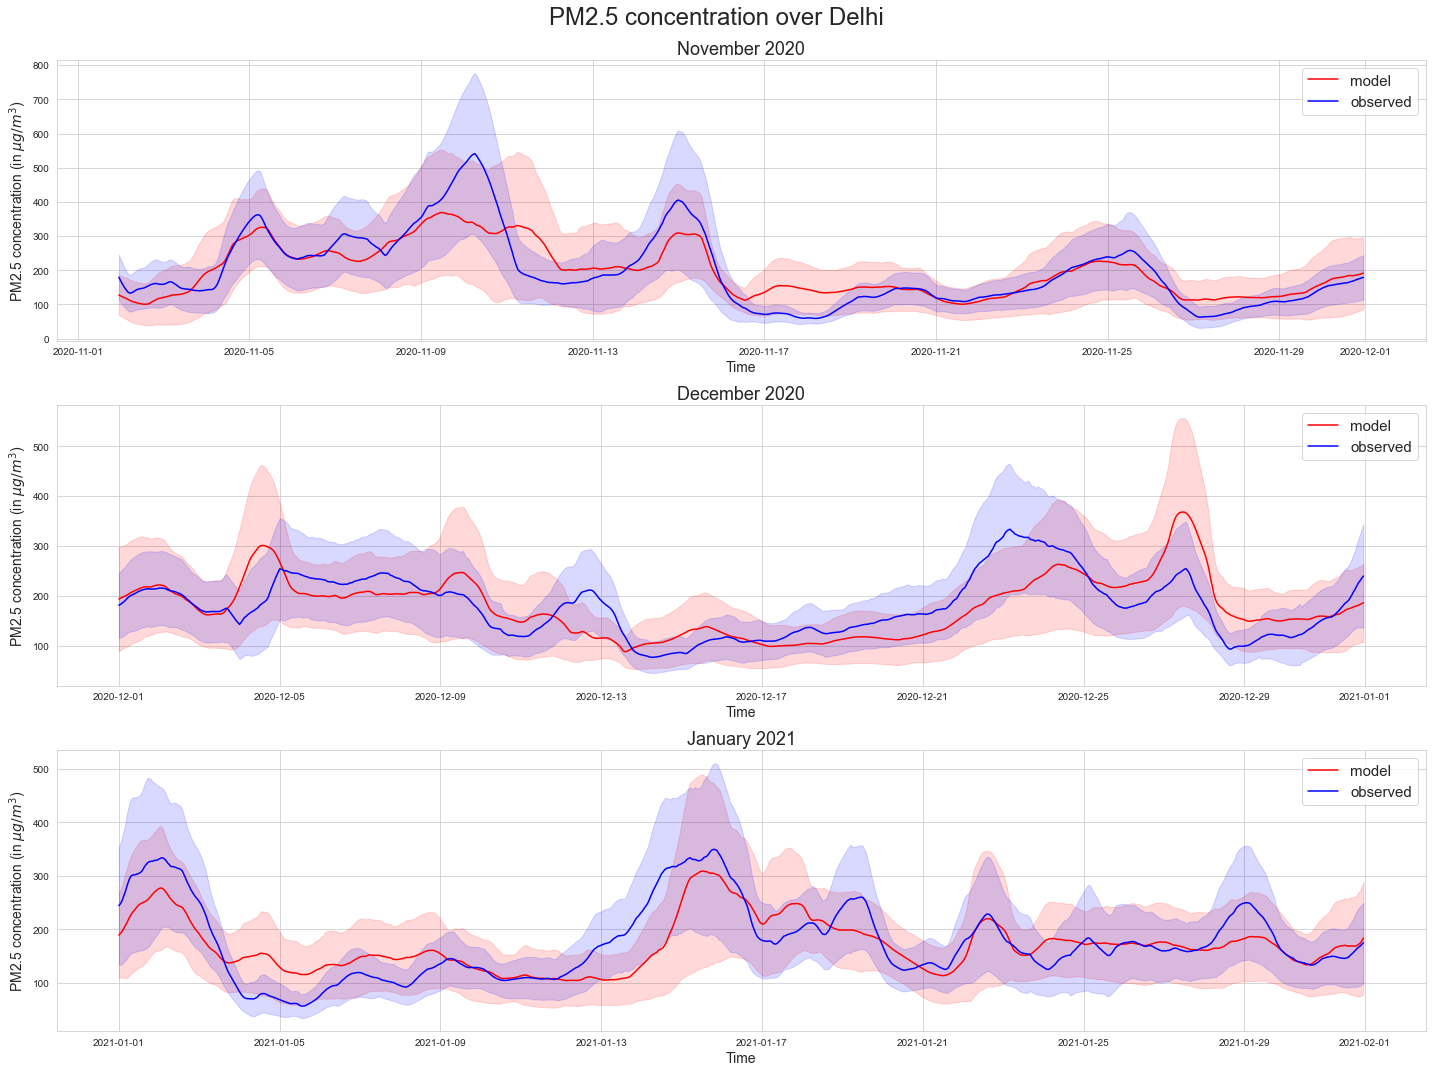

In [61]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_pm2'], yerr=dfmod_nov['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm2'] + dfnov['mod_pm2_stdev'], dfnov['mod_pm2'] - dfnov['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_pm2'], yerr=dfobs_nov['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm2'] + dfnov['obs_pm2_stdev'], dfnov['obs_pm2'] - dfnov['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfdec.index, dfdec['mod_pm2'], yerr=dfdec['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm2'] + dfdec['mod_pm2_stdev'], dfdec['mod_pm2'] - dfdec['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfdec.index, dfdec['obs_pm2'], yerr=dfdec['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm2'] + dfdec['obs_pm2_stdev'], dfdec['obs_pm2'] - dfdec['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfjan.index, dfjan['mod_pm2'], yerr=dfjan['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm2'] + dfjan['mod_pm2_stdev'], dfjan['mod_pm2'] - dfjan['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfjan.index, dfjan['obs_pm2'], yerr=dfjan['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm2'] + dfjan['obs_pm2_stdev'], dfjan['obs_pm2'] - dfjan['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err_running.png')

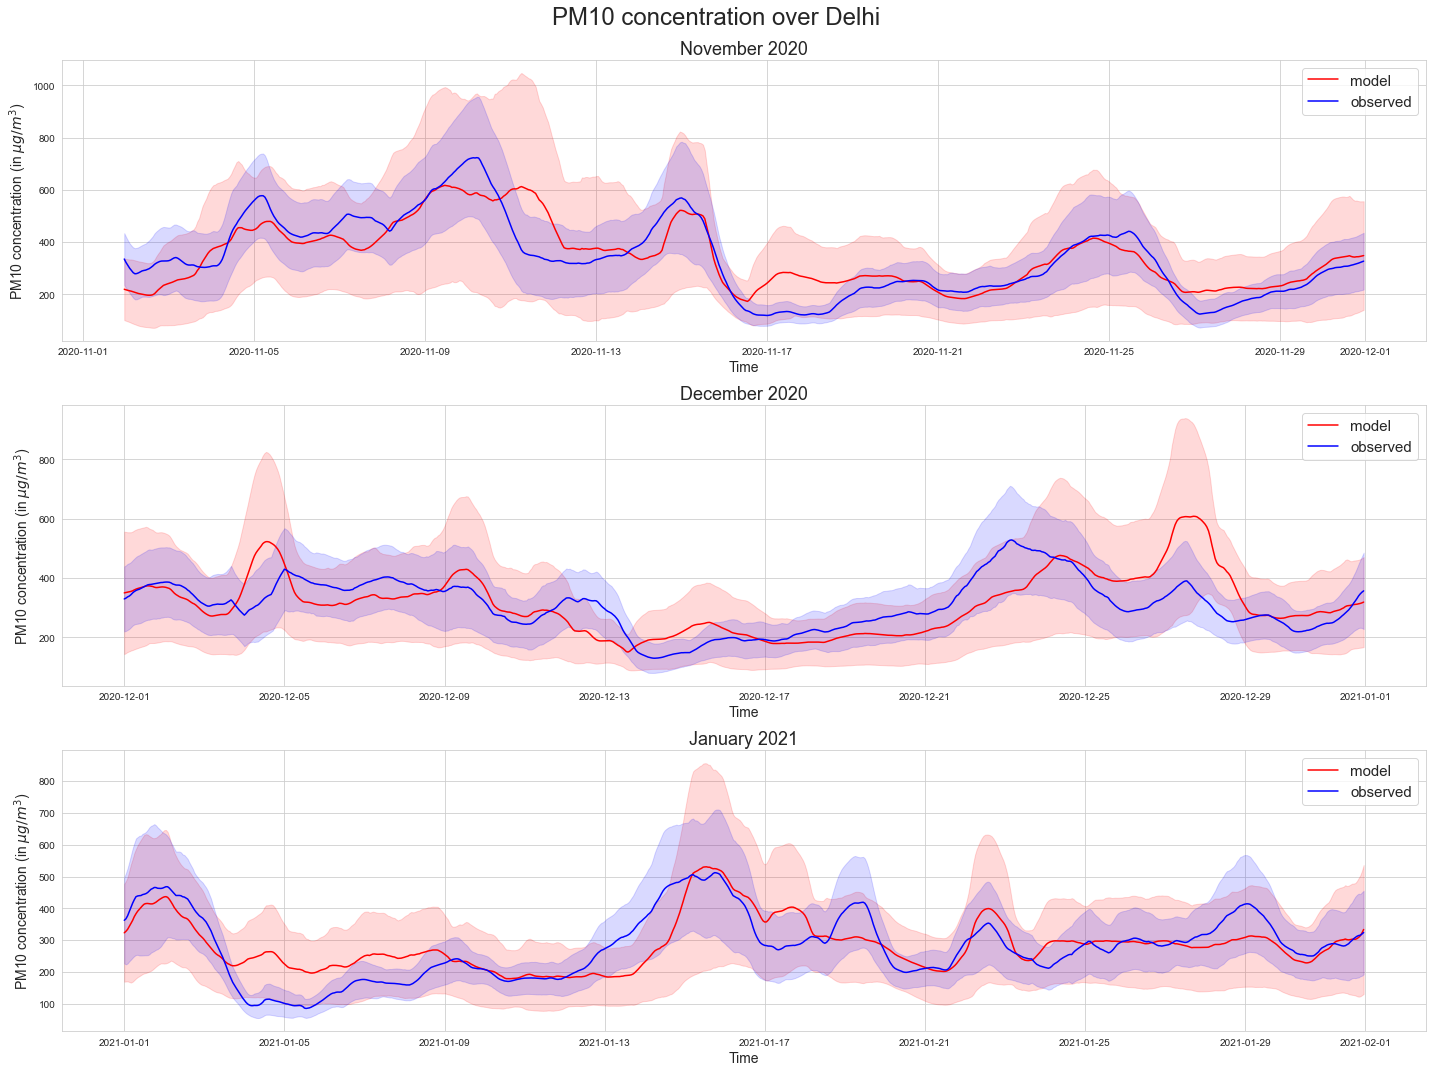

In [62]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm10'] + dfnov['mod_pm10_stdev'], dfnov['mod_pm10'] - dfnov['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm10'] + dfnov['obs_pm10_stdev'], dfnov['obs_pm10'] - dfnov['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm10'] + dfdec['mod_pm10_stdev'], dfdec['mod_pm10'] - dfdec['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm10'] + dfdec['obs_pm10_stdev'], dfdec['obs_pm10'] - dfdec['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm10'] + dfjan['mod_pm10_stdev'], dfjan['mod_pm10'] - dfjan['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm10'] + dfjan['obs_pm10_stdev'], dfjan['obs_pm10'] - dfjan['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err_running.png')

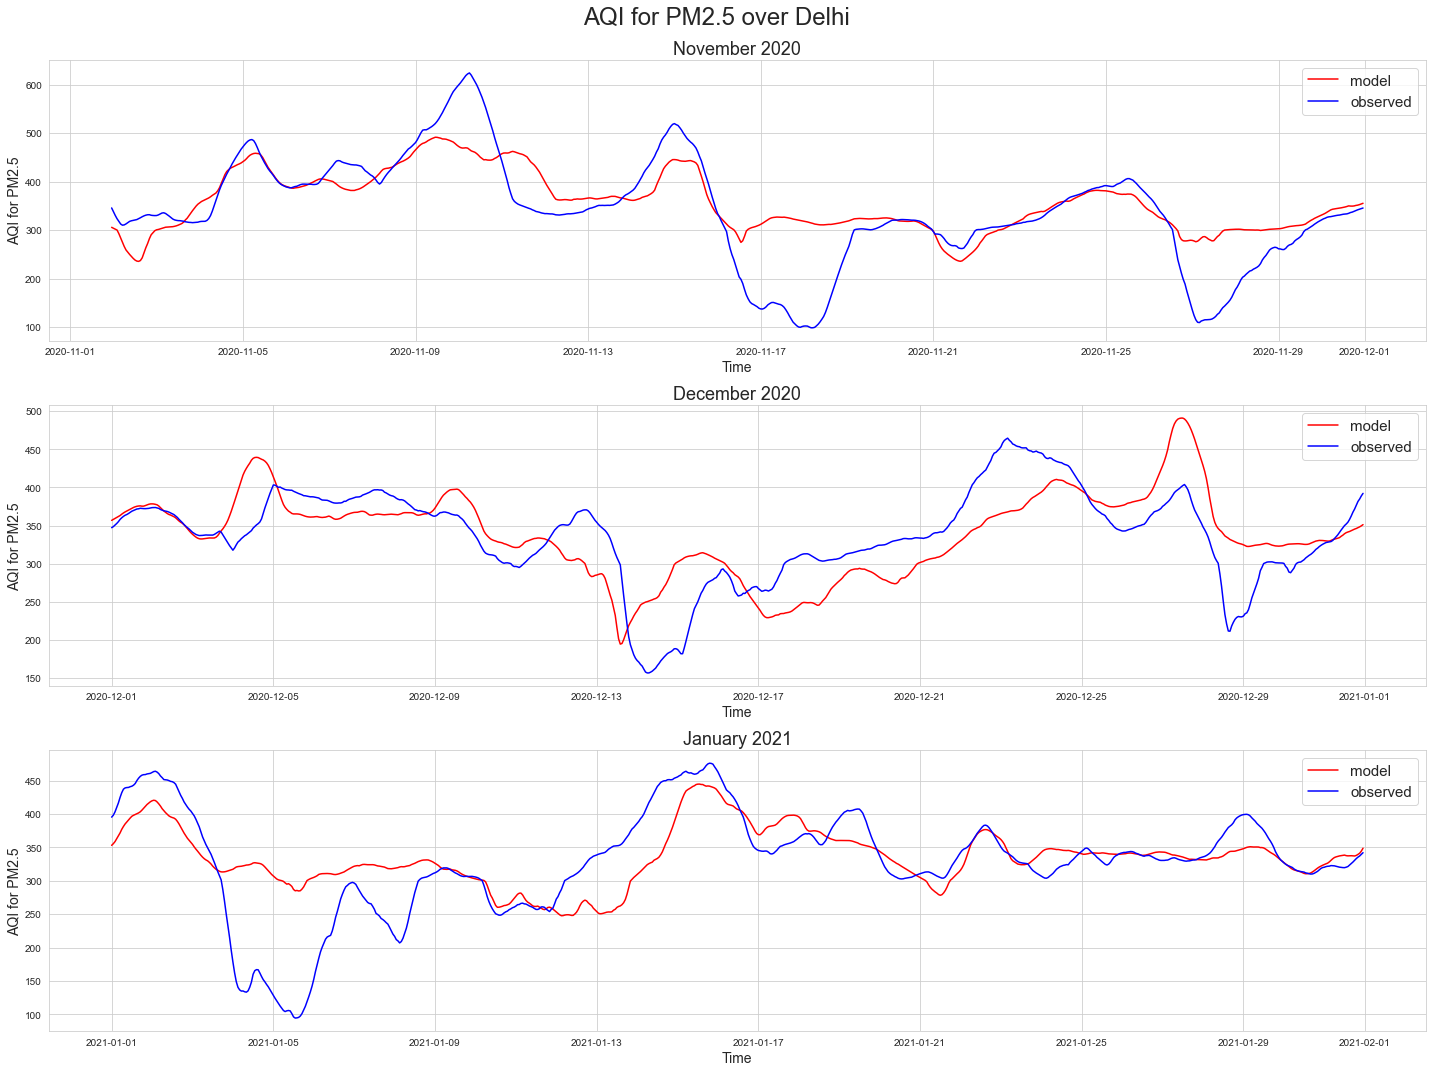

In [63]:
# Plot of AQI_PM2.5 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM2.5 over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm25_ts.png')

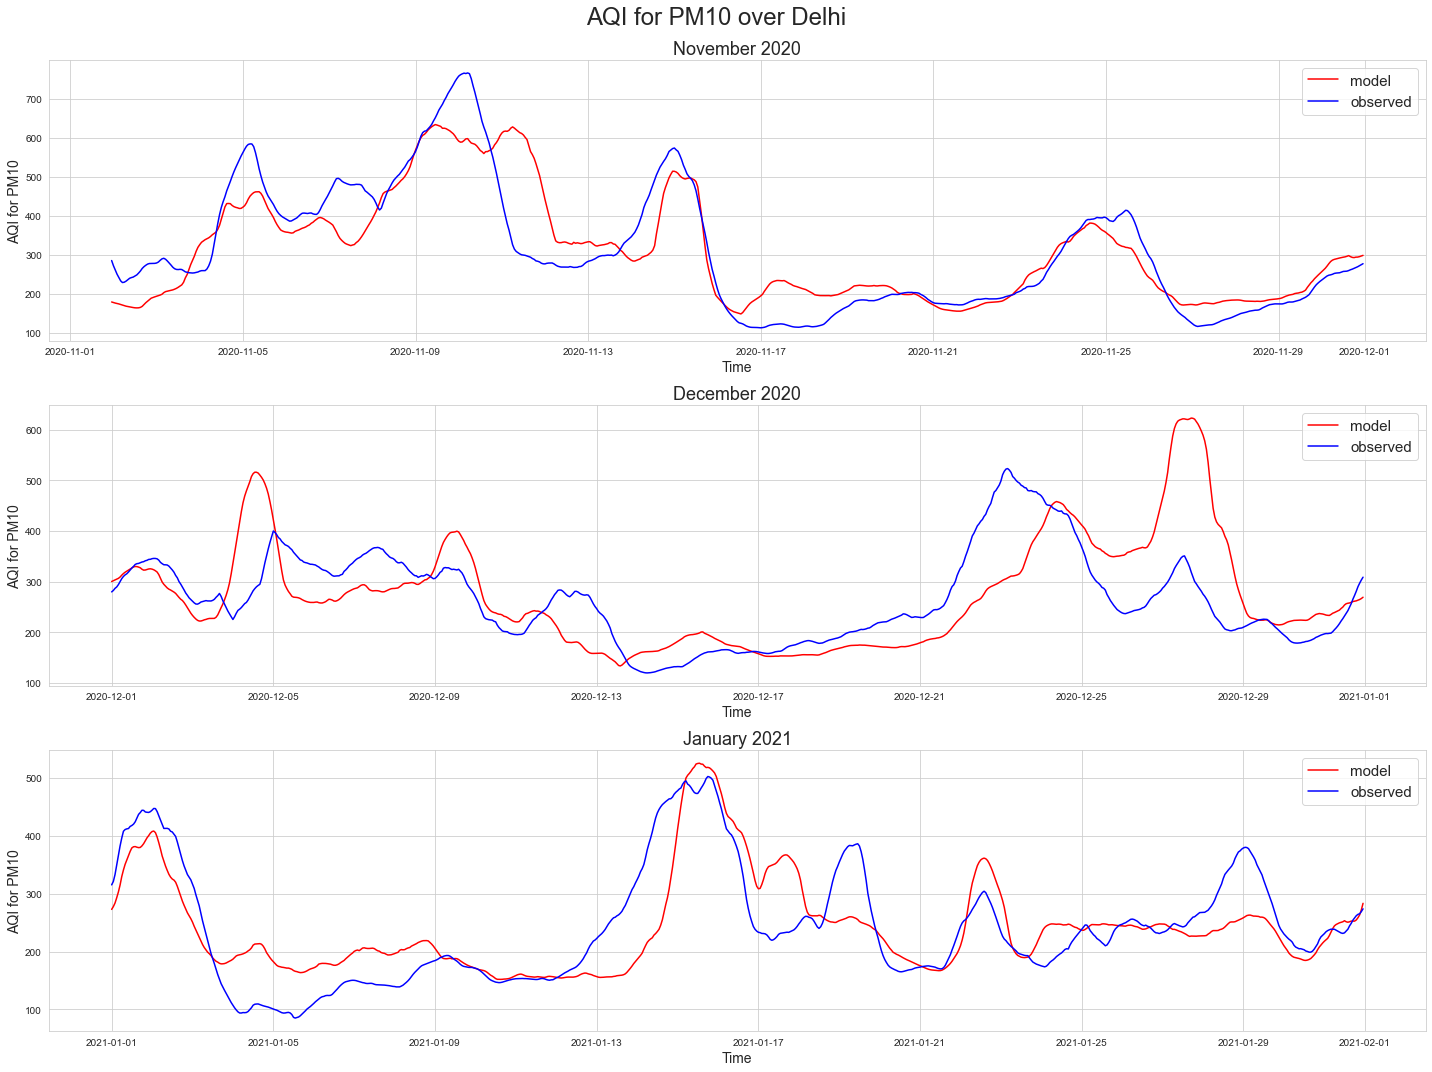

In [64]:
# Plot of AQI_PM10 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM10 over Delhi', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm10_ts.png')